In [1]:
import pandas as pd
import requests
import pprint
import json
import time
from pandas import json_normalize
import ast
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None) ## 셀 최대 너비 제한 해제

In [2]:
units_df = pd.read_csv('유닛 조합과 별갯수 테이블.csv')
units_df.T

,0,1,2,3,4,5,6,7,8,9,...,9278,9279,9280,9281,9282,9283,9284,9285,9286,9287
gameId,KR_7005435650,KR_7005435650,KR_7005435650,KR_7005435650,KR_7005435650,KR_7005435650,KR_7005435650,KR_7005435650,KR_7005408175,KR_7005408175,...,KR_7005149778,KR_7005149778,KR_7005139736,KR_7005139736,KR_7005139736,KR_7005139736,KR_7005139736,KR_7005139736,KR_7005139736,KR_7005139736
game_datetime,1711611092537,1711611092537,1711611092537,1711611092537,1711611092537,1711611092537,1711611092537,1711611092537,1711608635465,1711608635465,...,1711574024327,1711574024327,1711571877752,1711571877752,1711571877752,1711571877752,1711571877752,1711571877752,1711571877752,1711571877752
game_length,2339.676514,2339.676514,2339.676514,2339.676514,2339.676514,2339.676514,2339.676514,2339.676514,2161.773926,2161.773926,...,2346.074707,2346.074707,2173.421143,2173.421143,2173.421143,2173.421143,2173.421143,2173.421143,2173.421143,2173.421143
game_version,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,...,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>
puuid,BWLn3nfAuki-3ju22n-ni5exBESPlXaPsyF9bZ3uFeuvr1ks-ZL6B7x3SA_KVt_kNrHRfsg6VVk9YQ,mptEuTzeZ2MWsLxe4KfwLTr2iJp2uUphE7maw8CwGfeeFKXOVZ0_E8GccCzgNUfy0wiRJ1BGd1LOGQ,iM__viRIlCBc3VBF9p0BK9a58MsQTrB6Svi4asmtcw4vxkVZgPWgAB3ZY98VJHwbV2YhWUTzZr_XEQ,XwRIqTXBnBYgAU3Jct9FIDtrIOy01HBn4PUM6BecUex8D2MRFJlhDu2fcAvohMYPQrRGJK65ccfeCQ,bAUTBjhuA00n1167MUmonjyMgetU3Dv1-5IGNUqWwWt-59C4f_W2hhtPLqZ5KQTNdoQCjExuuGszZg,rx1nmyxEddDyQujL2nvjfiHV_LDcBEo-zyf16l3BFnXQExOMoB6tNss-WGlc_GRgcac2tg1GhDgBhg,dMhhqa_djjUT5P2jeQePRwhWzHVNKrf35C-z45JPsSKvfREWIhtlWUGHWke8oO3pf3ADGHpBABqL6g,yAVc-bTbi86qYF3ePtvTr0DTW367seRmnhXqPLIMwmw9xLZWbrw9uIX2wSTodseM41RIG-UnnGajOw,_tFZFQDxr3ipe-amA8IMZiUugmCq6rhTN9YrLPthGkJSnh1TbAB9j1v4_pUGvH7UWmwnNM_jUtDhAw,_VGTHEw4TgYAsfkDjFEvIk0FDfn4MMvItgLDd-NAq-lEKlTmv4oZ9TUrlvMGui-oiZvdi07yWsWOKg,...,vONPZNRf3tyDkd_mWk-0nDUPAgDJb6gt6qI_9qKfiXIL7U1WnibUtiWE1Mx5uIM3OZYog3SoT8fPsw,ZWNe7oOLcVQzKNoExAYXKQm_oZr6KsjEXji5ilpOOsg2efr-Tjl5Xe-xI6fXwpzyI7zEWDMdTZPRHQ,Vhs9Vq-UUa2_yiovh0mAgFJYQ8EUY5mfu_fMFJPttBTnCI0WqZNZMu9kiHVV3AUM_S3vbwxqIq1sRg,isHLordKTqogFpqDZ5fCHX8FsKdAPFLYZxPVb5-MeQuXV7qtso5qhL2bYU7ay4L3cU6pGoPgetcYXw,ci4IhQ-c9KUs-dkyNeqhitxs-7b5VGWZunymMHxUdooDZZ4cZ0L6x0mBX2VgPWCSi3No3H0OLN-h6g,sMD7iMyWZ2ztcGvcYyXf92yYF6ui0ipF8UInDkKm6wMnJc7abC_rkU3WJokvCuiO4Rln3ltQCc3xTw,4W5dMgFaI2qWXtzftLCjec16RypS_e_0BaHIynnzUApIEjpzmow5edpCgoq2Z7R4wwe8AhejYgf_sw,m-WJmbLS17zaoDDdN1NjqRMGuXkZChReSv8-36lQ32zgt2-TJU4Noj7CY246rk6qA0WmYVOE4kTogQ,eJBg1EVkQRS4fXbZKDAkyuQuYzL-kF1Ps7NOxHuwiAQ29VZgBEi20Je7sbVtqV-m-Y6ArWw2Hck5Iw,H7I8YjZ_H49ijjt7z4b6CZKJ0up1ug51YNS_PUhLR4p6cUAbQf0Vr91bpmtC2fQ4_DTZj_Hxl5OTlg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [3]:
# 기존 데이터프레임을 뒤에서 join 해주기 위해 그대로 두어야하므로 복사하여 combination_clustering 변수에 할당

combination_clustering = units_df.copy()

# '시비르'부터 '자야'까지의 컬럼값이 0인 경우를 제외하고 모두 1로 변경

combination_clustering.loc[:, '시비르':'자야'] = combination_clustering.loc[:, '시비르':'자야'].applymap(lambda x: 0 if x == 0 else 1)
              # 시비르 컬럼부터 자야 컬럼까지 모든행을 선택                         # 선택한 모든 데이터(applymap)에 람다 함수를 적용
                                                                                 # 여기서 람다 함수는 x가 0이면 0 나머지는 1로 치환
# 작업 확인
combination_clustering.columns

Index(['gameId', 'game_datetime', 'game_length', 'game_version', 'puuid',
       'placement', 'last_round', 'level', '시비르', '리븐', '쉔', '탐 켄치', '갈리오',
       '카이사', '사일러스', '우디르', '케일', '케이틀린', '렉사이', '잭스', '아트록스', '킨드레드', '세나',
       '나르', '오른', '아지르', '잔나', '소라카', '다이애나', '흐웨이', '라칸', '오공', '애니', '릴리아',
       '리산드라', '자이라', '모르가나', '카직스', '요네', '케인', '니코', '바드', '조이', '리 신',
       '이렐리아', '코그모', '일라오이', '야스오', '키아나', '볼리베어', '트리스타나', '애쉬', '노틸러스',
       '요릭', '알룬', '세트', '아리', '럭스', '아무무', '신드라', '코부코', '다리우스', '아펠리오스',
       '쓰레쉬', '초가스', '말파이트', '가렌', '티모', '자야', 'Combination'],
      dtype='object')

In [4]:
base_df=combination_clustering.drop(['gameId', 'game_datetime', 'game_length', 'game_version', 'puuid',
       'placement', 'last_round','Combination', 'level'], axis=1)

In [5]:
base_df

,시비르,리븐,쉔,탐 켄치,갈리오,카이사,사일러스,우디르,케일,케이틀린,...,신드라,코부코,다리우스,아펠리오스,쓰레쉬,초가스,말파이트,가렌,티모,자야
0,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9283,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9284,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9285,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,0
9286,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [6]:
cols=['시비르', '리븐', '쉔', '탐 켄치', '갈리오',
       '카이사', '사일러스', '우디르', '케일', '케이틀린', '렉사이', '잭스', '아트록스', '킨드레드', '세나',
       '나르', '오른', '아지르', '잔나', '소라카', '다이애나', '흐웨이', '라칸', '오공', '애니', '릴리아',
       '리산드라', '자이라', '모르가나', '카직스', '요네', '케인', '니코', '바드', '조이', '리 신',
       '이렐리아', '코그모', '일라오이', '야스오', '키아나', '볼리베어', '트리스타나', '애쉬', '노틸러스',
       '요릭', '알룬', '세트', '아리', '럭스', '아무무', '신드라', '코부코', '다리우스', '아펠리오스',
       '쓰레쉬', '초가스', '말파이트', '가렌', '티모', '자야']
base_df['combined'] =base_df[cols].apply(lambda row: ''.join(row.values.astype(str)), axis=1)

In [7]:
base_df2 = base_df['combined']

In [8]:
base_df2 = base_df2.reset_index()

In [9]:
base_df2.head()

,index,combined
0,0,1111111110000000000000000000000000000000000000000000000000000
1,1,0000000001111111110000000000000000000000000000000000000000000
2,2,0000000100000000111111110000000000000000000000000000000000000
3,3,0001001100000000100001101110000000000000000000000000000000000
4,4,0100100110000000101010000001100000000000000000000000000000000


In [10]:
base_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9288 entries, 0 to 9287
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     9288 non-null   int64 
 1   combined  9288 non-null   object
dtypes: int64(1), object(1)
memory usage: 145.2+ KB


In [11]:
from sklearn.preprocessing import StandardScaler
features = ['combined']
# Separating out the features
x = base_df2.loc[:, features].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

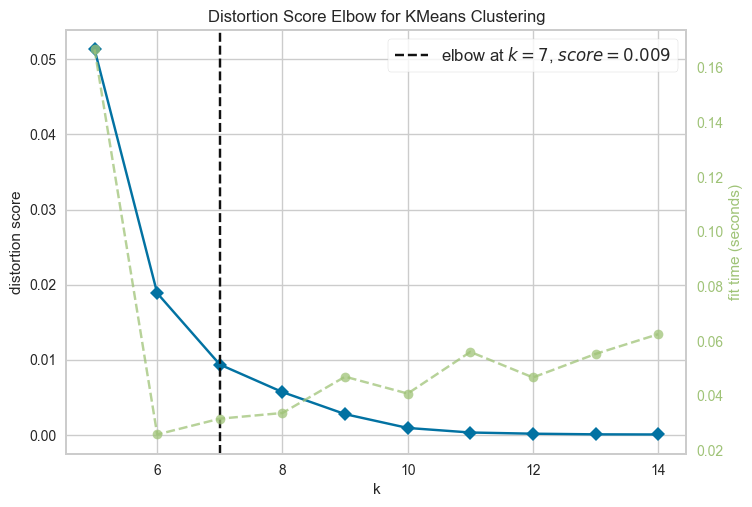

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
# using yellowbrick library 
model = KMeans()
visualizer = KElbowVisualizer(model, k=(5,15)) # set K range 

visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()

In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7, random_state=42, n_init="auto").fit(x)

# 결과 확인
result_by_sklearn = base_df2.copy()
result_by_sklearn["cluster"] = kmeans.labels_
result_by_sklearn.head()

,index,combined,cluster
0,0,1111111110000000000000000000000000000000000000000000000000000,6
1,1,0000000001111111110000000000000000000000000000000000000000000,0
2,2,0000000100000000111111110000000000000000000000000000000000000,0
3,3,0001001100000000100001101110000000000000000000000000000000000,0
4,4,0100100110000000101010000001100000000000000000000000000000000,2


In [14]:
result_by_sklearn=result_by_sklearn.drop(['index'], axis=1)

In [15]:
r_df = result_by_sklearn.groupby(['cluster']).count()

<Axes: xlabel='cluster'>

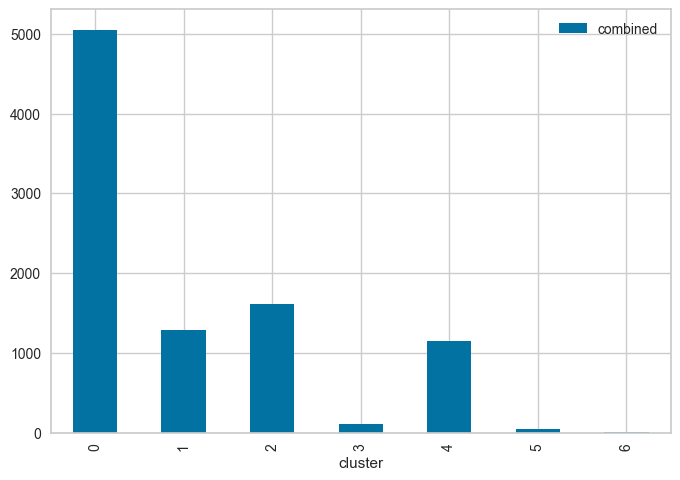

In [16]:
result_by_sklearn.groupby(['cluster']).count().plot(kind='bar')

In [17]:
r_df

,combined
cluster,
0,5050
1,1293
2,1616
3,110
4,1152
5,51
6,16


In [18]:
import seaborn as sns


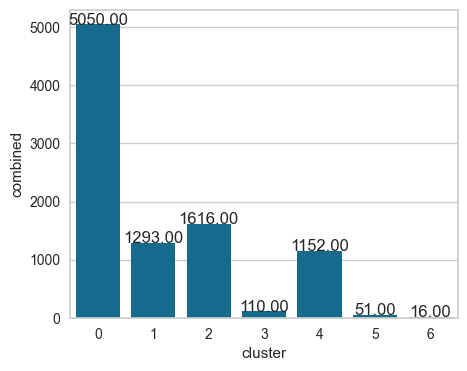

In [19]:
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(5,4) )

# 바차트 그리기
sns.barplot(x = r_df.index, y = r_df['combined'])

# 값 가져와서 -> 텍스트 추가하기
for p in ax.patches:
    ax.text(p.get_x() + (p.get_width()/2) ,   # 가로 위치
            p.get_y() + p.get_height(),   # 세로 위치
            f"{p.get_height():.2f}",     # 값 + 표시방법 소수 둘째자리까지 
            ha = 'center' )   # 좌우정렬 중간으로

In [20]:
result_by_sklearn

,combined,cluster
0,1111111110000000000000000000000000000000000000000000000000000,6
1,0000000001111111110000000000000000000000000000000000000000000,0
2,0000000100000000111111110000000000000000000000000000000000000,0
3,0001001100000000100001101110000000000000000000000000000000000,0
4,0100100110000000101010000001100000000000000000000000000000000,2
...,...,...
9283,0100100010000000000111110010000000011000000000000000000000000,2
9284,0000000100000000111110110000100000000000000000000000000000000,0
9285,0000000000000000000000000010000000000010000100000111001100000,0
9286,0010000001011010000000000000100100000010000000000000000000000,4


##### 기존 유닛 테이블의 combination 컬럼을 가져와서 클러스터링이 잘 되었는지 확인 작업

In [21]:
combination_df = units_df[['Combination']]

combination_df

,Combination
0,"TFT11_Sivir, TFT11_Riven, TFT11_Shen, TFT11_TahmKench, TFT11_Galio, TFT11_Kaisa, TFT11_Sylas, TFT11_Udyr, TFT11_Kayle"
1,"TFT11_Caitlyn, TFT11_RekSai, TFT11_Jax, TFT11_Aatrox, TFT11_Kindred, TFT11_Senna, TFT11_Gnar, TFT11_Ornn, TFT11_Azir"
2,"TFT11_Udyr, TFT11_Ornn, TFT11_Azir, TFT11_Janna, TFT11_Soraka, TFT11_Diana, TFT11_Hwei, TFT11_Rakan, TFT11_WuKong"
3,"TFT11_TahmKench, TFT11_Sylas, TFT11_Udyr, TFT11_Ornn, TFT11_Hwei, TFT11_Rakan, TFT11_Annie, TFT11_Lillia, TFT11_Lissandra"
4,"TFT11_Riven, TFT11_Galio, TFT11_Udyr, TFT11_Kayle, TFT11_Ornn, TFT11_Janna, TFT11_Diana, TFT11_Zyra, TFT11_Morgana"
...,...
9283,"TFT11_Riven, TFT11_Galio, TFT11_Kayle, TFT11_Soraka, TFT11_Diana, TFT11_Hwei, TFT11_Rakan, TFT11_WuKong, TFT11_Lissandra, TFT11_LeeSin, TFT11_Irelia"
9284,"TFT11_Udyr, TFT11_Ornn, TFT11_Azir, TFT11_Janna, TFT11_Soraka, TFT11_Diana, TFT11_Rakan, TFT11_WuKong, TFT11_Morgana"
9285,"TFT11_Lissandra, TFT11_Illaoi, TFT11_Ashe, TFT11_Lux, TFT11_Amumu, TFT11_Syndra, TFT11_Aphelios, TFT11_Thresh"
9286,"TFT11_Shen, TFT11_Caitlyn, TFT11_Jax, TFT11_Aatrox, TFT11_Senna, TFT11_Morgana, TFT11_Kayn, TFT11_Illaoi"


In [26]:
for_check = pd.concat([result_by_sklearn, combination_df], axis=1)

for_check[for_check['cluster'] == 3].head()

,combined,cluster,Combination
263,1000100010000000000000000000100000000000000000000000000000100,3,"TFT11_Sivir, TFT11_Galio, TFT11_Kayle, TFT11_Morgana, TFT11_Garen"
287,1001110110000000001010100000000000011000000000000000000000000,3,"TFT11_Sivir, TFT11_TahmKench, TFT11_Galio, TFT11_Kaisa, TFT11_Udyr, TFT11_Kayle, TFT11_Janna, TFT11_Diana, TFT11_Rakan, TFT11_LeeSin, TFT11_Irelia"
421,1000111110001000100010000001000000000000000000000000000000000,3,"TFT11_Sivir, TFT11_Galio, TFT11_Kaisa, TFT11_Sylas, TFT11_Udyr, TFT11_Kayle, TFT11_Aatrox, TFT11_Ornn, TFT11_Diana, TFT11_Zyra"
468,1001100000000000000101100000000011000000000010000000000000000,3,"TFT11_Sivir, TFT11_TahmKench, TFT11_Galio, TFT11_Soraka, TFT11_Hwei, TFT11_Rakan, TFT11_Neeko, TFT11_Bard, TFT11_Nautilus"
491,1001100010000000000100000000000011100000000010000000000000000,3,"TFT11_Sivir, TFT11_TahmKench, TFT11_Galio, TFT11_Kayle, TFT11_Soraka, TFT11_Neeko, TFT11_Bard, TFT11_Zoe, TFT11_Nautilus"


In [23]:
## 0. 밸류
## 1. 신화 바드 탐켄치
## 2. 용군주 아지르(주요 5코 기물 누락 - 용군주 아지르 밸류 가다가 실패한 그룹으로 추정)
## 3. 
## 4. 혼령 리롤
## 5. 
## 6. 